In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from index_evaluator import load_authors_data, evaluate_all_with_expert_index
from data_utils import load_author_publications
from index_metrics import (
    h_index, g_index, i10_index, ha_index, ar_index,
    timed_h_index, contemporary_h_index, trend_h_index,
    career_years_h_index_by_average_citations_per_year,
)
from viz_utils import *

In [3]:
# 설정
authors_file = "./gsc_data/authors.all"
data_dir = "./gsc_data/DATA/"
output_file = "all_index_results.csv"
current_year = 2013

In [4]:
# 1. 지수 계산 및 로딩
print("Calculating or loading exponents...")
authors_data = load_authors_data(authors_file)
if not os.path.exists(output_file):
    index_df, max_q, max_r = evaluate_all_with_expert_index(authors_data, data_dir, current_year)
    print(max_q, max_r)
    index_df.to_csv(output_file, index=False)
else:
    index_df = pd.read_csv(output_file)

Calculating or loading exponents...


In [5]:
start_year = 1970
end_year = 2013

authors_data = load_authors_data(authors_file)

for year in range(start_year, end_year + 1):
    expert_by_year_file = f"index_by_{year}.csv"
    if not os.path.exists(expert_by_year_file):
        print(f"Calculating the full author year-by-year index...{expert_by_year_file}")
        index_df, max_q, max_r = evaluate_all_with_expert_index(authors_data, data_dir, year)
        print(max_q, max_r)
        index_df.to_csv(expert_by_year_file, index=False)
        print(f"Completion of calculation for {year}")
    else:
        index_df = pd.read_csv(expert_by_year_file)
        print(f"Load completed in {year}")
        df_expert_by_year = pd.read_csv(expert_by_year_file)
        print("Complete existing expert_index_by_year.csv load")

Load completed in 1970
Complete existing expert_index_by_year.csv load
Load completed in 1971
Complete existing expert_index_by_year.csv load
Load completed in 1972
Complete existing expert_index_by_year.csv load
Load completed in 1973
Complete existing expert_index_by_year.csv load
Load completed in 1974
Complete existing expert_index_by_year.csv load
Load completed in 1975
Complete existing expert_index_by_year.csv load
Load completed in 1976
Complete existing expert_index_by_year.csv load
Load completed in 1977
Complete existing expert_index_by_year.csv load
Load completed in 1978
Complete existing expert_index_by_year.csv load
Load completed in 1979
Complete existing expert_index_by_year.csv load
Load completed in 1980
Complete existing expert_index_by_year.csv load
Load completed in 1981
Complete existing expert_index_by_year.csv load
Load completed in 1982
Complete existing expert_index_by_year.csv load
Load completed in 1983
Complete existing expert_index_by_year.csv load
Load c

In [6]:
authors_data = load_authors_data(authors_file)
    
fixed_year=2013
# Prepare summary list to collect correlation results
summary = []

for increment in range(0, 101, 10):
    a = increment
    b = 100 - increment

    print(f"Calculating expert index for year {fixed_year} with alpha={a}, beta={b}")

    expert_file = f"index_{fixed_year}_a{a}_b{b}.csv"

    if not os.path.exists(expert_file):
        # Load and evaluate authors for the fixed year
        index_df, max_q, max_r = evaluate_all_with_expert_index(
            authors_data, data_dir, current_year=fixed_year, a=a, b=b
        )
        index_df.to_csv(expert_file, index=False)
        print(f"Saved results to {expert_file}")
    else:
        index_df = pd.read_csv(expert_file)
        print(f"Loaded existing results from {expert_file}")

    # Compute Spearman correlation with specific indices
    spearman_corr = index_df.corr(method='spearman')
    # Extract correlations of expert_index with target indices
    summary_row = {
        'a': a,
        'b': b,
        'h': spearman_corr.at['expert_index','h_index'],
        'i10': spearman_corr.at['expert_index','i10_index'],
        'hc': spearman_corr.at['expert_index','contemporary_h_index'],
        'ar': spearman_corr.at['expert_index','ar_index'],
        'h_t5': spearman_corr.at['expert_index','timed_h_index_5']
    }
    summary.append(summary_row)

# After loop, save summary table
summary_df = pd.DataFrame(summary)
summary_df.to_csv(f"expert_corr_summary_{fixed_year}.csv", index=False)
print(f"Summary correlations saved to expert_corr_summary_{fixed_year}.csv")


Calculating expert index for year 2013 with alpha=0, beta=100
Loaded existing results from index_2013_a0_b100.csv
Calculating expert index for year 2013 with alpha=10, beta=90
Loaded existing results from index_2013_a10_b90.csv
Calculating expert index for year 2013 with alpha=20, beta=80
Loaded existing results from index_2013_a20_b80.csv
Calculating expert index for year 2013 with alpha=30, beta=70
Loaded existing results from index_2013_a30_b70.csv
Calculating expert index for year 2013 with alpha=40, beta=60
Loaded existing results from index_2013_a40_b60.csv
Calculating expert index for year 2013 with alpha=50, beta=50
Loaded existing results from index_2013_a50_b50.csv
Calculating expert index for year 2013 with alpha=60, beta=40
Loaded existing results from index_2013_a60_b40.csv
Calculating expert index for year 2013 with alpha=70, beta=30
Loaded existing results from index_2013_a70_b30.csv
Calculating expert index for year 2013 with alpha=80, beta=20
Loaded existing results fr

In [7]:

fixed_year = 2013
authors_data = load_authors_data(authors_file)

# Prepare summary list to collect correlation results
summary = []

# Increment alpha and beta by 10, keeping year fixed at 2013
for increment in range(0, 101, 10):
    a = increment
    b = 100 - increment

    print(f"Calculating expert index for year {fixed_year} with alpha={a}, beta={b}")

    expert_file = f"index_{fixed_year}_a{a}_b{b}.csv"

    if not os.path.exists(expert_file):
        # Load and evaluate authors for the fixed year
        index_df, max_q, max_r = evaluate_all_with_expert_index(
            authors_data, data_dir, current_year=fixed_year, a=a, b=b
        )
        index_df.to_csv(expert_file, index=False)
        print(f"Saved results to {expert_file}")
    else:
        index_df = pd.read_csv(expert_file)
        print(f"Loaded existing results from {expert_file}")

    # Compute Spearman correlation with specific indices
    spearman_corr = index_df.corr(method='spearman')
    # Extract correlations of expert_index with target indices
    summary_row = {
        'a': a,
        'b': b,
        'h': spearman_corr.at['expert_index','h_index'],
        'i10': spearman_corr.at['expert_index','i10_index'],
        'hc': spearman_corr.at['expert_index','contemporary_h_index'],
        'ar': spearman_corr.at['expert_index','ar_index'],
        'h_t5': spearman_corr.at['expert_index','timed_h_index_5'],
        'ha' : spearman_corr.at['expert_index','ha_index']
    }
    summary.append(summary_row)

    # Inside the alpha/beta loop: analyze only top 1% authors (~top 800)
    top_n = max(1, int(0.1 * len(index_df)))  # 1% of total
    if len(index_df) >= top_n:
        top1_df = index_df.nlargest(top_n, 'expert_index')
        top1_corr = top1_df[['expert_index', 'h_index', 'i10_index', 'contemporary_h_index', 'ar_index', 'timed_h_index_5','ha_index']]
        top1_spearman = top1_corr.corr(method='spearman')
        top1_file = f"spearman_corr_top10pct_{fixed_year}_a{a}_b{b}.csv"
        top1_spearman.to_csv(top1_file)
        print(f"Top 10% Spearman correlations saved to {top1_file}")
    else:
        print(f"Index DF has fewer authors than 10% threshold, skipping top1% for a={a}, b={b}")

# After processing all alpha/beta, save summary table
summary_df = pd.DataFrame(summary)
summary_df.to_csv(f"expert_corr_summary_{fixed_year}.csv", index=False)
print(f"Summary correlations saved to expert_corr_summary_{fixed_year}.csv")

# Merge all top1% spearman files into one DataFrame
merged_list = []
for increment in range(0, 101, 10):
    top1_file = f"spearman_corr_top10pct_{fixed_year}_a{increment}_b{100-increment}.csv"
    if os.path.exists(top1_file):
        df_top1 = pd.read_csv(top1_file, index_col=0)
        # flatten correlations of expert_index row
        row = df_top1.loc['expert_index']
        row['a'] = increment
        row['b'] = 100 - increment
        merged_list.append(row)

if merged_list:
    merged_df = pd.DataFrame(merged_list)
    # reorder columns
    cols = ['a','b','h_index','i10_index','contemporary_h_index','ar_index','timed_h_index_5','ha_index']
    merged_df = merged_df[cols]
    merged_df.to_csv(f"merged_top10pct_corr_{fixed_year}.csv", index=False)
    print(f"Merged top1% correlations saved to merged_top10pct_corr_{fixed_year}.csv")
else:
    print("No top1% correlation files found to merge.")


Calculating expert index for year 2013 with alpha=0, beta=100
Loaded existing results from index_2013_a0_b100.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a0_b100.csv
Calculating expert index for year 2013 with alpha=10, beta=90
Loaded existing results from index_2013_a10_b90.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a10_b90.csv
Calculating expert index for year 2013 with alpha=20, beta=80
Loaded existing results from index_2013_a20_b80.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a20_b80.csv
Calculating expert index for year 2013 with alpha=30, beta=70
Loaded existing results from index_2013_a30_b70.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a30_b70.csv
Calculating expert index for year 2013 with alpha=40, beta=60
Loaded existing results from index_2013_a40_b60.csv
Top 10% Spearman correlations saved to spearman_corr_top10pct_2013_a40_b60.csv
Calculating expert index for year 2

In [8]:
overall_df = pd.read_csv("expert_corr_summary_2013.csv")
top10_df = pd.read_csv("merged_top10pct_corr_2013.csv")
top1_df = pd.read_csv("merged_top1pct_corr_2013.csv")

In [9]:
indices = {
    'i10': ('i10-index', overall_df['i10'], top10_df['i10_index'], top1_df['i10_index']),
    'hc': ('contemporary h-index', overall_df['hc'], top10_df['contemporary_h_index'], top1_df['contemporary_h_index']),
    'ar': ('ar-index', overall_df['ar'], top10_df['ar_index'], top1_df['ar_index']),
    'h_t5': ('timed h-index (5yr)', overall_df['h_t5'], top10_df['timed_h_index_5'], top1_df['timed_h_index_5']),
    'ha': ('ha-index', overall_df['ha'], top10_df['ha_index'], top1_df['ha_index']),
}


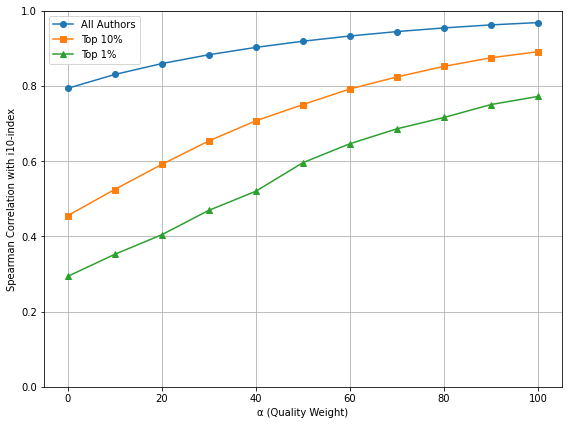

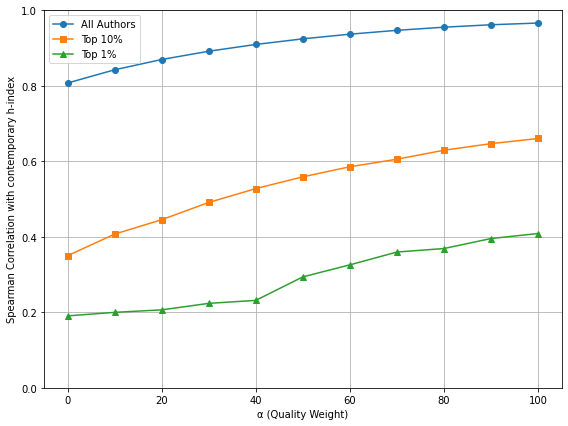

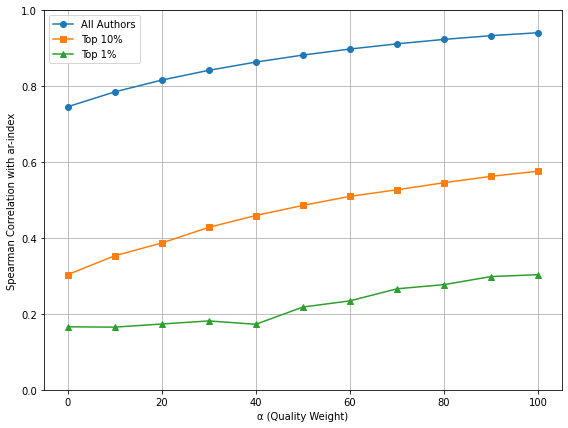

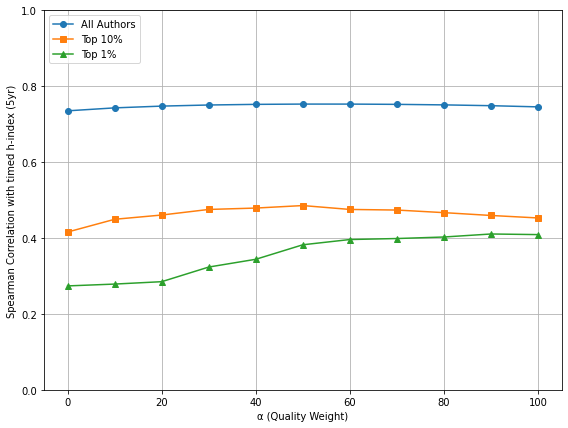

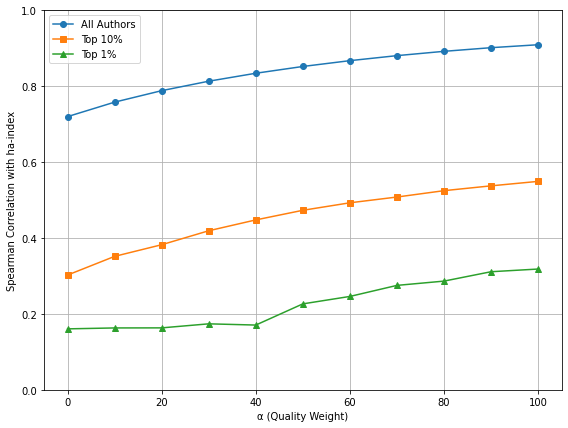

In [10]:
for key, (label, y_all, y_top10, y_top1) in indices.items():
    plt.figure(figsize=(8, 6))
    plt.plot(overall_df['a'], y_all, marker='o', label='All Authors')
    plt.plot(top10_df['a'], y_top10, marker='s', label='Top 10%')
    plt.plot(top1_df['a'], y_top1, marker='^', label='Top 1%')
    # plt.title(f"Comparison of {label} Correlation with Expert Index by α")
    plt.xlabel("α (Quality Weight)")
    plt.ylabel(f"Spearman Correlation with {label}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0.0, 1.0)
    plt.legend(loc='upper left')
    plt.show()


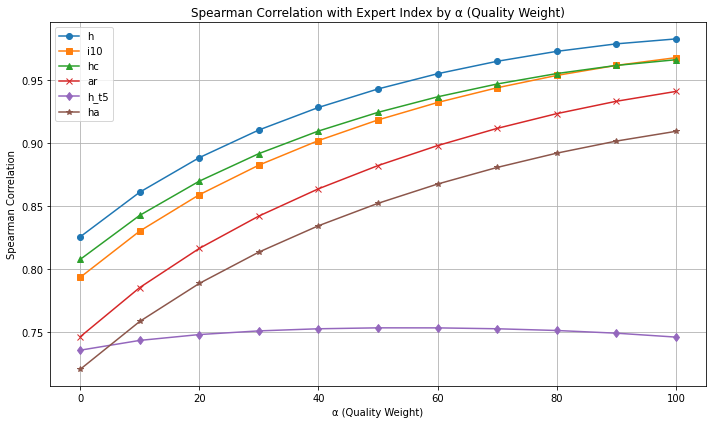

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("expert_corr_summary_2013.csv")

plt.figure(figsize=(10, 6))

plt.plot(df['a'], df['h'], marker='o', label='h')
plt.plot(df['a'], df['i10'], marker='s', label='i10')
plt.plot(df['a'], df['hc'], marker='^', label='hc')
plt.plot(df['a'], df['ar'], marker='x', label='ar')
plt.plot(df['a'], df['h_t5'], marker='d', label='h_t5')
plt.plot(df['a'], df['ha'], marker='*', label='ha')

plt.title("Spearman Correlation with Expert Index by α (Quality Weight)")
plt.xlabel("α (Quality Weight)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


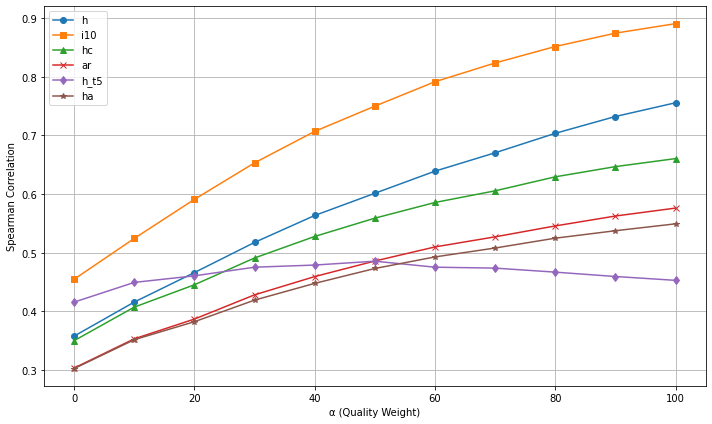

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("merged_top10pct_corr_2013.csv")

plt.figure(figsize=(10, 6))
plt.plot(df['a'], df['h_index'], marker='o', label='h')
plt.plot(df['a'], df['i10_index'], marker='s', label='i10')
plt.plot(df['a'], df['contemporary_h_index'], marker='^', label='hc')
plt.plot(df['a'], df['ar_index'], marker='x', label='ar')
plt.plot(df['a'], df['timed_h_index_5'], marker='d', label='h_t5')
plt.plot(df['a'], df['ha_index'], marker='*', label='ha')

# plt.title("Spearman Correlation with Expert Index by α (Quality Weight)")
plt.xlabel("α (Quality Weight)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


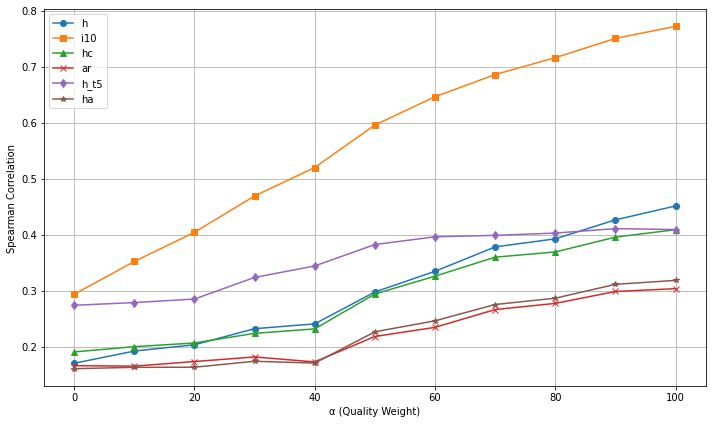

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("merged_top1pct_corr_2013.csv")

plt.figure(figsize=(10, 6))
plt.plot(df['a'], df['h_index'], marker='o', label='h')
plt.plot(df['a'], df['i10_index'], marker='s', label='i10')
plt.plot(df['a'], df['contemporary_h_index'], marker='^', label='hc')
plt.plot(df['a'], df['ar_index'], marker='x', label='ar')
plt.plot(df['a'], df['timed_h_index_5'], marker='d', label='h_t5')
plt.plot(df['a'], df['ha_index'], marker='*', label='ha')

plt.xlabel("α (Quality Weight)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
